### Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries for Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier


# Import necessary libraries for Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Import necessary libraries for Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

### Data Import

In [2]:
# Load the test data
test_data = pd.read_csv('test.csv', sep=',')

# Load the train data
train_data = pd.read_csv('train.csv', sep=',')


In [3]:
# Display information about the train data
print(train_data.info())
print(train_data.iloc[1])

# Display information about the test data
print(test_data.info())
print(test_data.iloc[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (F

### Data Preprocessing

In [4]:
# Remove not necessary column from the training and testing datasets
train_data = train_data.drop('Name', axis=1)
test_data = test_data.drop('Name', axis=1)
train_data = train_data.drop('Ticket', axis=1)
test_data = test_data.drop('Ticket', axis=1)

#### Missing values

In [5]:
# Replace missing values in the 'Age' column with the median
imputer = SimpleImputer(strategy='median')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])

# Drop columns with too many missing values (e.g., 'Cabin')
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

# Replace missing values in the 'Embarked' column with the most frequent value
most_frequent_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_frequent_embarked, inplace=True)
test_data['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Replace missing values in the 'Fare' column with the median
most_frequent_Fare = train_data['Fare'].median()
train_data['Fare'].fillna(most_frequent_Fare, inplace=True)
test_data['Fare'].fillna(most_frequent_Fare, inplace=True)

In [6]:
# Count missing values in train_data
missing_values_train = train_data.isnull().sum()

# Count missing values in test_data
missing_values_test = test_data.isnull().sum()

print("Missing values in train_data:\n", missing_values_train)
print("\nMissing values in test_data:\n", missing_values_test)


Missing values in train_data:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Missing values in test_data:
 PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


#### Encoding

In [7]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'Sex', 'Embarked', and 'Pclass' columns in the training data
train_data_encoded = pd.DataFrame(encoder.fit_transform(train_data[['Sex', 'Embarked', 'Pclass']]).toarray(), columns=encoder.get_feature_names_out(['Sex', 'Embarked', 'Pclass']))

# Concatenate the encoded columns with the rest of the data
train_data = pd.concat([train_data.drop(['Sex', 'Embarked', 'Pclass'], axis=1), train_data_encoded], axis=1)


#### Standardization

In [8]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the 'Fare' column in the training data
train_data['Fare'] = scaler.fit_transform(train_data[['Fare']])


In [9]:
data = train_data.copy()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex_female   891 non-null    float64
 7   Sex_male     891 non-null    float64
 8   Embarked_C   891 non-null    float64
 9   Embarked_Q   891 non-null    float64
 10  Embarked_S   891 non-null    float64
 11  Pclass_1     891 non-null    float64
 12  Pclass_2     891 non-null    float64
 13  Pclass_3     891 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 97.6 KB


### Correalation Matrix

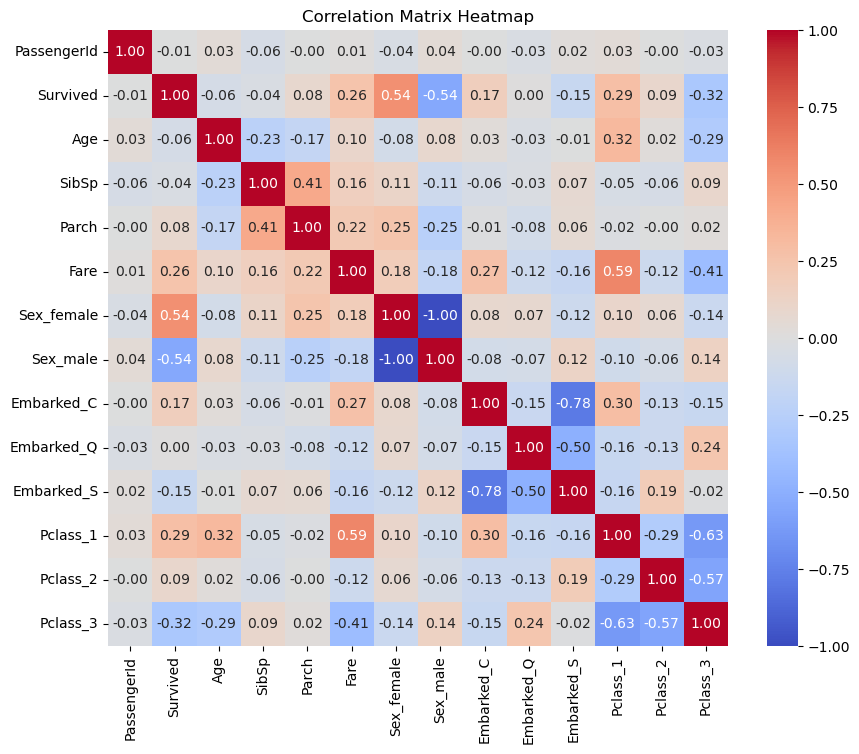

In [11]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


#### Statistically significant columns

In [12]:
# Calculate the correlation coefficient and p-value for each column
for column in data.columns:
    if column != 'Survived':
        correlation, p_value = stats.pearsonr(data[column], data['Survived'])
        print(f"Column: {column}")
        print(f"Correlation Coefficient: {correlation:.2f}")
        print(f"P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("The correlation is statistically significant.")
        else:
            print("The correlation is not statistically significant.")
        print("\n")


Column: PassengerId
Correlation Coefficient: -0.01
P-value: 0.8814
The correlation is not statistically significant.


Column: Age
Correlation Coefficient: -0.06
P-value: 0.0528
The correlation is not statistically significant.


Column: SibSp
Correlation Coefficient: -0.04
P-value: 0.2922
The correlation is not statistically significant.


Column: Parch
Correlation Coefficient: 0.08
P-value: 0.0148
The correlation is statistically significant.


Column: Fare
Correlation Coefficient: 0.26
P-value: 0.0000
The correlation is statistically significant.


Column: Sex_female
Correlation Coefficient: 0.54
P-value: 0.0000
The correlation is statistically significant.


Column: Sex_male
Correlation Coefficient: -0.54
P-value: 0.0000
The correlation is statistically significant.


Column: Embarked_C
Correlation Coefficient: 0.17
P-value: 0.0000
The correlation is statistically significant.


Column: Embarked_Q
Correlation Coefficient: 0.00
P-value: 0.9134
The correlation is not statistically si

#### Feature importances

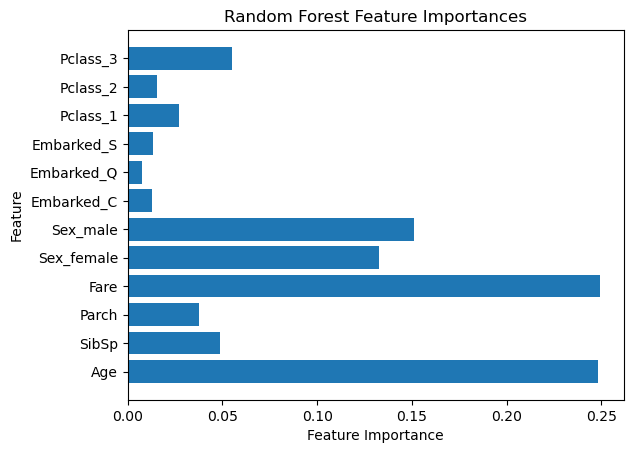

In [13]:
# Separate features and target variable
X = data.drop(['PassengerId', 'Survived'], axis=1)
y = data['Survived']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Create a bar chart of the feature importances
plt.barh(X_train.columns, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()


In [14]:
data.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [15]:
# Remove the specified columns from the DataFrame
data = data.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2'], axis=1)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex_female   891 non-null    float64
 7   Sex_male     891 non-null    float64
 8   Pclass_3     891 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 62.8 KB


### Modeling

In [17]:
# Define the parameter grids for each model
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'sag', 'saga', 'newton-cg']
}

param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV objects
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, scoring='accuracy')
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the GridSearchCV objects to the data
grid_search_logreg.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score for each model
print("Logistic Regression Best Parameters: ", grid_search_logreg.best_params_)
print("Logistic Regression Best Accuracy: ", grid_search_logreg.best_score_)
print("Decision Tree Best Parameters: ", grid_search_dt.best_params_)
print("Decision Tree Best Accuracy: ", grid_search_dt.best_score_)
print("Random Forest Best Parameters: ", grid_search_rf.best_params_)
print("Random Forest Best Accuracy: ", grid_search_rf.best_score_)


Logistic Regression Best Parameters:  {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression Best Accuracy:  0.7991234117994681
Decision Tree Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Decision Tree Best Accuracy:  0.8145966709346991
Random Forest Best Parameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Best Accuracy:  0.8230178272431793


The best parameters for each model were chosen using grid search with cross-validation. Grid search is a technique for hyperparameter tuning that involves training a model on a grid of different hyperparameter values and selecting the combination that results in the best performance on a validation set.

For Logistic Regression, the best regularization parameter (C) was found to be 0.1 and the best solver was 'newton-cg'. The regularization parameter C controls the trade-off between fitting the training data well and avoiding overfitting. A smaller value of C results in a simpler model that may underfit the data, while a larger value of C results in a more complex model that may overfit the data. The 'newton-cg' solver is a good choice for large datasets and can handle multiclass problems.

For Decision Tree, the best criterion was found to be 'entropy', the best maximum depth was 5, and the best minimum samples split was 10. The criterion 'entropy' measures the impurity of a node based on the entropy of the class distribution, while 'gini' measures the impurity based on the Gini impurity. The maximum depth parameter controls the maximum number of decision levels in the tree, while the minimum samples split parameter controls the minimum number of samples required to split an internal node.

For Random Forest, the best maximum depth was found to be None (i.e., no maximum depth), the best maximum features was 'sqrt', the best minimum samples split was 5, and the best number of estimators was 200. The maximum depth parameter controls the maximum number of decision levels in each tree, while the maximum features parameter controls the maximum number of features considered when splitting a node. The minimum samples split parameter controls the minimum number of samples required to split an internal node, and the number of estimators parameter controls the number of trees in the forest.

### Model Evaluation

Logistic Regression Accuracy: 0.8
Logistic Regression Precision: 0.78
Logistic Regression Recall: 0.72
Logistic Regression F1-Score: 0.75


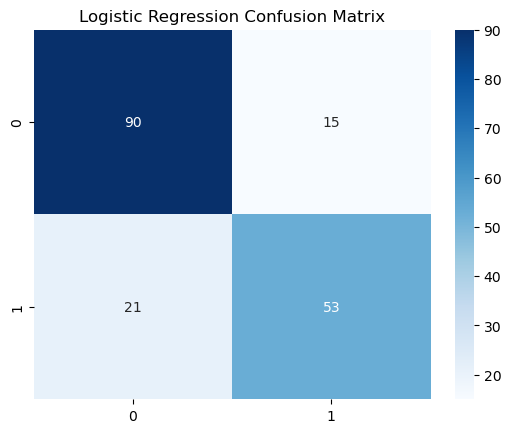

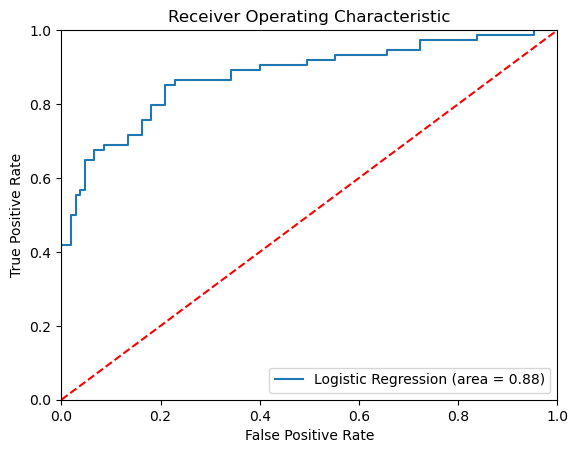

Decision Tree Accuracy: 0.78
Decision Tree Precision: 0.72
Decision Tree Recall: 0.77
Decision Tree F1-Score: 0.75


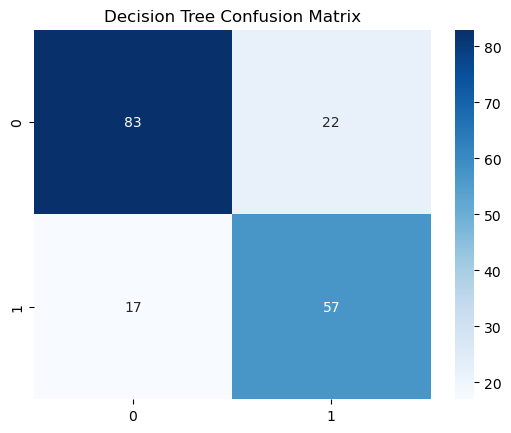

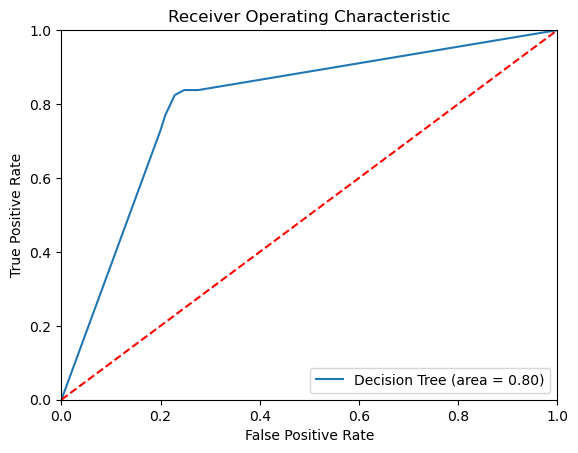

Random Forest Accuracy: 0.81
Random Forest Precision: 0.78
Random Forest Recall: 0.76
Random Forest F1-Score: 0.77


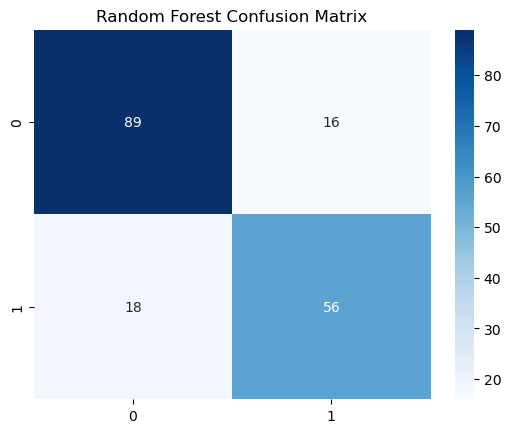

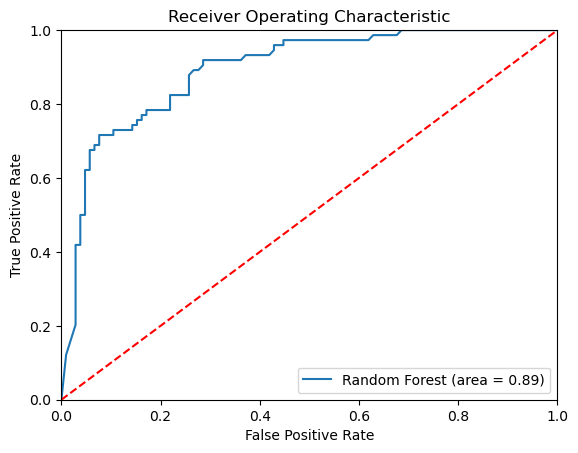

In [18]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
print('Logistic Regression Accuracy:', round(accuracy_score(y_val, y_pred_logreg), 2))
print('Logistic Regression Precision:', round(precision_score(y_val, y_pred_logreg), 2))
print('Logistic Regression Recall:', round(recall_score(y_val, y_pred_logreg), 2))
print('Logistic Regression F1-Score:', round(f1_score(y_val, y_pred_logreg), 2))
cm_logreg = confusion_matrix(y_val, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# ROC curve and AUC for Logistic Regression
y_pred_proba_logreg = logreg.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_logreg)
roc_auc = round(auc(fpr, tpr), 2)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
print('Decision Tree Accuracy:', round(accuracy_score(y_val, y_pred_dt), 2))
print('Decision Tree Precision:', round(precision_score(y_val, y_pred_dt), 2))
print('Decision Tree Recall:', round(recall_score(y_val, y_pred_dt), 2))
print('Decision Tree F1-Score:', round(f1_score(y_val, y_pred_dt), 2))
cm_dt = confusion_matrix(y_val, y_pred_dt)
sns.heatmap(cm_dt, annot=True, cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# ROC curve and AUC for Decision Tree
y_pred_proba_dt = dt.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_dt)
roc_auc = round(auc(fpr, tpr), 2)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'Decision Tree (area = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print('Random Forest Accuracy:', round(accuracy_score(y_val, y_pred_rf), 2))
print('Random Forest Precision:', round(precision_score(y_val, y_pred_rf), 2))
print('Random Forest Recall:', round(recall_score(y_val, y_pred_rf), 2))
print('Random Forest F1-Score:', round(f1_score(y_val, y_pred_rf), 2))
cm_rf = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC curve and AUC for Random Forest
y_pred_proba_rf = rf.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_rf)
roc_auc = round(auc(fpr, tpr), 2)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'Random Forest (area = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
